In [1]:
%config Completer.use_jedi = False

In [68]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import re

(예제) 다음이 주어졌을 때, word와 document를 2차원으로 그려보고, python 과 가까운 단어를 순서대로 나열해보라.

``` python
example = [
    "Machine learning is super fun",
    "Python is super, super cool",
    "Statistics is cool, too",
    "Data science is fun",
    "Python is great for machine learning",
    "I like football",
    "Football is great to watch"
]```

``` python
corpus = OrderedDict(
    {
        'cool':0, 
        'data':1,
        'football':2,
        'fun':3,
        'great':4,
        'learning':5,
        'like':6,
        'machine':7,
        'python':8,
        'science':9,
        'statistics':10,
        'super':11,
        'watch':12
    }
)```

In [3]:
example = [
    "Machine learning is super fun",
    "Python is super, super cool",
    "Statistics is cool, too",
    "Data science is fun",
    "Python is great for machine learning",
    "I like football",
    "Football is great to watch"
]

In [4]:
example = ['문장1','문장2']

['Machine learning is super fun',
 'Python is super, super cool',
 'Statistics is cool, too',
 'Data science is fun',
 'Python is great for machine learning',
 'I like football',
 'Football is great to watch']

In [5]:
corpus = OrderedDict(
    {
        'cool':0, 
        'data':1,
        'football':2,
        'fun':3,
        'great':4,
        'learning':5,
        'like':6,
        'machine':7,
        'python':8,
        'science':9,
        'statistics':10,
        'super':11,
        'watch':12
    }
)

In [20]:
num_lists = int(input("How many lists do you want? "))
lists = [[] for i in range(num_lists)]

How many lists do you want? 4


In [21]:
lists

[[], [], [], []]

In [28]:
d1 = example[0]
d2 = example[1]
d3 = example[2]
d4 = example[3]
d5 = example[4]
d6 = example[5]
d7 = example[6]

In [29]:
def parse_document(doc):
    tokens = doc.split(' ')
    tokens = map(str.lower, tokens)
    tokens = list(tokens)
    tokens = [re.sub(r'[^a-zA-Z0-9-]', '', token) for token in tokens]
    
    return tokens

In [47]:
d1_tokens = parse_document(d1)
d2_tokens = parse_document(d2)
d3_tokens = parse_document(d3)
d4_tokens = parse_document(d4)
d5_tokens = parse_document(d5)
d6_tokens = parse_document(d6)
d7_tokens = parse_document(d7)


print(d1_tokens)
print(d2_tokens)
print(d3_tokens)
print(d4_tokens)
print(d5_tokens)
print(d6_tokens)
print(d7_tokens)


['machine', 'learning', 'is', 'super', 'fun']
['python', 'is', 'super', 'super', 'cool']
['statistics', 'is', 'cool', 'too']
['data', 'science', 'is', 'fun']
['python', 'is', 'great', 'for', 'machine', 'learning']
['i', 'like', 'football']
['football', 'is', 'great', 'to', 'watch']


In [33]:
for v, i in corpus.items():
    print(v, i)

cool 0
data 1
football 2
fun 3
great 4
learning 5
like 6
machine 7
python 8
science 9
statistics 10
super 11
watch 12


In [34]:
# Document vector를 생성하는 코드를 함수로 바꿔보자.
def get_doc_vector(tokens):
    doc_vec = [1 if v in tokens else 0 for v, i in corpus.items()]
    return doc_vec

In [48]:
d1_vec = get_doc_vector(d1_tokens)
d2_vec = get_doc_vector(d2_tokens)
d3_vec = get_doc_vector(d3_tokens)
d4_vec = get_doc_vector(d4_tokens)
d5_vec = get_doc_vector(d5_tokens)
d6_vec = get_doc_vector(d6_tokens)
d7_vec = get_doc_vector(d7_tokens)

print(d1_vec)
print(d2_vec)
print(d3_vec)
print(d4_vec)
print(d5_vec)
print(d6_vec)
print(d7_vec)

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]


In [49]:
A = np.array([d1_vec, d2_vec, d3_vec, d4_vec, d5_vec, d6_vec, d7_vec])
A

array([[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

In [50]:
doc_mat = np.dot(A, A.T)
doc_mat

array([[4, 1, 0, 1, 2, 0, 0],
       [1, 3, 1, 0, 1, 0, 0],
       [0, 1, 2, 0, 0, 0, 0],
       [1, 0, 0, 3, 0, 0, 0],
       [2, 1, 0, 0, 4, 0, 1],
       [0, 0, 0, 0, 0, 2, 1],
       [0, 0, 0, 0, 1, 1, 3]])

In [51]:
word_mat = np.dot(A.T, A)
word_mat

array([[2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

In [52]:
U, sig, V_T = np.linalg.svd(A)

In [191]:
# word_eigen_val, word_eigen_vec = np.linalg.eig(np.dot(A.T, A))

In [192]:
word_eigen_vec =  U[:,:2]

In [193]:
word_eigen_vec

array([[-0.63555233,  0.3116475 ],
       [-0.35219853,  0.13826479],
       [-0.07303416,  0.07324226],
       [-0.16627132,  0.35104399],
       [-0.63765049, -0.26214197],
       [-0.03657726, -0.38783282],
       [-0.17638947, -0.73214047]])

In [54]:
word_eigen_val

array([ 6.82238103e+00,  3.88777334e+00,  3.40902971e+00,  2.83209187e+00,
        1.73351605e+00,  1.23802682e+00,  1.07718117e+00,  3.29061336e-16,
       -3.60373074e-16, -1.65660688e-16, -8.71662318e-17,  5.80487724e-17,
        4.33698469e-17])

In [55]:
word_eigen_vec

array([[-0.16280159, -0.10726903, -0.56753028, -0.47167366, -0.09339555,
        -0.15827037, -0.01428834, -0.01960426,  0.56619757, -0.36715871,
         0.11154356,  0.0347829 , -0.04067401],
       [-0.06365747, -0.17803733,  0.31234068, -0.32694004, -0.30586704,
         0.14910562, -0.14965023, -0.0804178 ,  0.24198569,  0.43885399,
        -0.43679311, -0.37131046,  0.29036016],
       [-0.08153494,  0.56801159,  0.15891516, -0.38342851,  0.335503  ,
         0.02427125, -0.04296669, -0.07645369, -0.05393549, -0.31000451,
         0.30194111, -0.34835068,  0.06829271],
       [-0.30698056, -0.33609413,  0.4400973 , -0.27204415,  0.08150866,
        -0.11361448,  0.13810005, -0.13179439, -0.18964598, -0.32256315,
        -0.16249069, -0.2184093 ,  0.19550798],
       [-0.31165761,  0.50426555,  0.06500102,  0.06438076, -0.42490916,
        -0.04276529,  0.08261717, -0.57388546, -0.01577313,  0.01073241,
        -0.01824752,  0.09138969, -0.18678142],
       [-0.48744948, -0.025107

In [ ]:
pd.options.display.max_colwidth

In [56]:
word_eigen_vec[:,:2]

array([[-0.16280159, -0.10726903],
       [-0.06365747, -0.17803733],
       [-0.08153494,  0.56801159],
       [-0.30698056, -0.33609413],
       [-0.31165761,  0.50426555],
       [-0.48744948, -0.02510749],
       [-0.01400371,  0.19669535],
       [-0.48744948, -0.02510749],
       [-0.37896663,  0.06282621],
       [-0.06365747, -0.17803733],
       [-0.02796134, -0.03714593],
       [-0.37816335, -0.2281799 ],
       [-0.06753123,  0.37131624]])

In [57]:
np.sqrt(word_eigen_val)

/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([2.61196880e+00, 1.97174373e+00, 1.84635579e+00, 1.68288201e+00,
       1.31663057e+00, 1.11266654e+00, 1.03787339e+00, 1.81400479e-08,
                  nan,            nan,            nan, 7.61897450e-09,
       6.58557871e-09])

In [58]:
sig

array([2.6119688 , 1.97174373, 1.84635579, 1.68288201, 1.31663057,
       1.11266654, 1.03787339])

k = 2

In [63]:
word_vec = np.dot(np.diag(sig[:2]), word_eigen_vec[:, :2].T)

In [65]:
word_vec

array([[-0.42523269, -0.16627132, -0.21296672, -0.80182365, -0.81403996,
        -1.27320282, -0.03657726, -1.27320282, -0.98984902, -0.16627132,
        -0.07303416, -0.98775086, -0.17638947],
       [-0.21150705, -0.35104399,  1.11997329, -0.66269149,  0.99428243,
        -0.04950553,  0.38783282, -0.04950553,  0.12387718, -0.35104399,
        -0.07324226, -0.44991228,  0.73214047]])

In [73]:
w_x = word_vec[0]
w_y = word_vec[1]

In [74]:
w_x.shape

(13,)

In [75]:
w_y.shape

(13,)

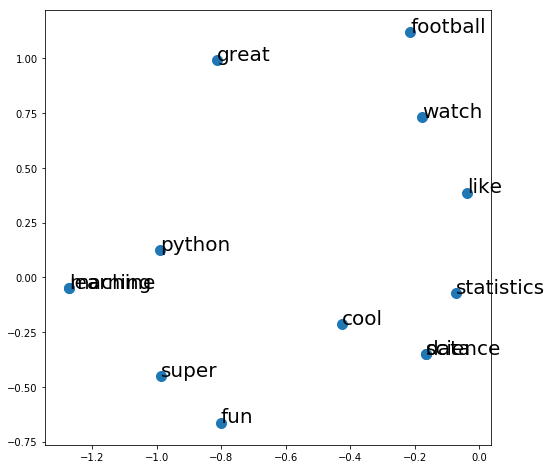

In [76]:
mpl.rcParams['figure.figsize'] = (8, 8)

fig, ax = plt.subplots()

# Scatter
ax.scatter(w_x, w_y, s=100)

# Scatter에 라벨링을 한다.
for i, txt in enumerate(corpus.keys()):
    ax.annotate(txt, (w_x[i], w_y[i]), fontsize=20)  # free와 live가 겹쳐지는 위치

In [78]:
doc_eigen_val, doc_eigen_vec = np.linalg.eig(np.dot(A, A.T))

In [80]:
doc_vec = np.dot(doc_eigen_vec[:, :2], np.diag(sig[:2]))

In [85]:
doc_x = doc_vec[:, 0]
doc_y = doc_vec[:, 1]

In [86]:
doc_x

array([1.66004286, 0.91993157, 0.19076294, 0.43429549, 1.6655232 ,
       0.09553865, 0.46072378])

In [87]:
doc_y

array([ 0.58885805,  0.34960825, -0.37884819, -0.30624728, -0.88224317,
       -1.13924054,  1.05131263])

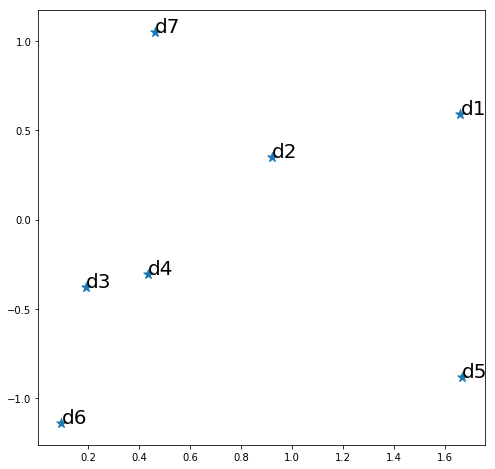

In [88]:
fig, ax = plt.subplots()

# Scatter
ax.scatter(doc_x, doc_y, marker='*', s=100)

# Scatter에 라벨링을 한다.
for i, txt in enumerate(['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7']):
    ax.annotate(txt, (doc_x[i], doc_y[i]), fontsize=20)

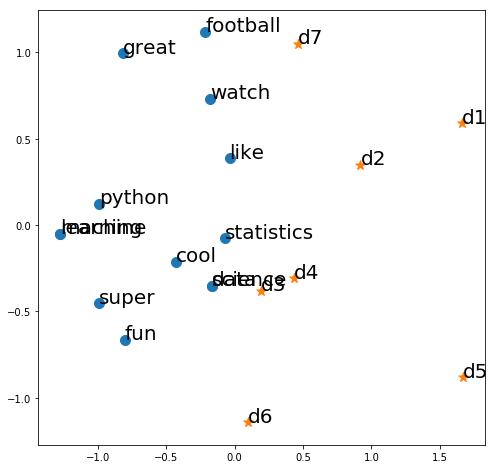

In [92]:
fig, ax = plt.subplots()
ax.scatter(w_x, w_y, s=100)
for i, txt in enumerate(corpus.keys()):
    ax.annotate(txt, (w_x[i], w_y[i]), fontsize=20)
    
ax.scatter(doc_x, doc_y, marker='*', s = 100)
for i, txt in enumerate(['d1','d2','d3','d4','d5','d6','d7']):
    ax.annotate(txt, (doc_x[i], doc_y[i]), fontsize=20)

$\text{Cosine Similarity} = \frac{d_i q}{|d_i| |q|}$

In [109]:
word_vec[:,9]

array([-0.16627132, -0.35104399])

In [110]:
query_python = word_vec[:, 9]

In [111]:
def get_consine_similarity(doc, query):
    dot_prod = np.dot(doc, query)
    len_doc = np.sqrt(sum(doc ** 2))
    len_query = np.sqrt(sum(query ** 2))
    
    return dot_prod / (len_doc * len_query)

In [96]:
docs = [d1, d2, d3, d4, d5, d6, d7]

In [105]:
doc_vec

array([[ 1.66004286,  0.58885805],
       [ 0.91993157,  0.34960825],
       [ 0.19076294, -0.37884819],
       [ 0.43429549, -0.30624728],
       [ 1.6655232 , -0.88224317],
       [ 0.09553865, -1.13924054],
       [ 0.46072378,  1.05131263]])

In [112]:
result = {}
for idx, doc in zip(docs, doc_vec):
    result[get_consine_similarity(doc, query_python)] = idx

In [114]:
result

{-0.9995703139417103: 'Football is great to watch',
 -0.7211939191220444: 'Python is super, super cool',
 -0.7055665618630329: 'Machine learning is super fun',
 0.04477192848224812: 'Python is great for machine learning',
 0.1709907382646454: 'Data science is fun',
 0.6146804710694271: 'Statistics is cool, too',
 0.8648169439762244: 'I like football'}

In [113]:
import operator

# 최종결과를 sorting하라!
sorted(result.items(), key=operator.itemgetter(0), reverse=True)

[(0.8648169439762244, 'I like football'),
 (0.6146804710694271, 'Statistics is cool, too'),
 (0.1709907382646454, 'Data science is fun'),
 (0.04477192848224812, 'Python is great for machine learning'),
 (-0.7055665618630329, 'Machine learning is super fun'),
 (-0.7211939191220444, 'Python is super, super cool'),
 (-0.9995703139417103, 'Football is great to watch')]

In [118]:
query_python

array([-0.16627132, -0.35104399])

Text(-0.166271,-0.351044,'query_python')

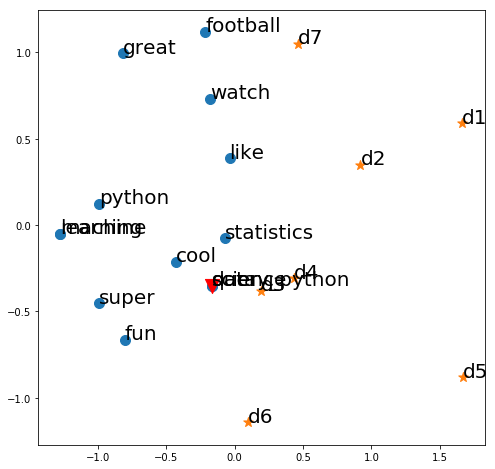

In [122]:
fig, ax = plt.subplots()
ax.scatter(w_x, w_y, s=100)
for i, txt in enumerate(corpus.keys()):
    ax.annotate(txt, (w_x[i], w_y[i]), fontsize=20)
    
ax.scatter(doc_x, doc_y, marker='*', s=100)
for i, txt in enumerate(['d1', 'd2', 'd3', 'd4', 'd5','d6','d7']):
    ax.annotate(txt, (doc_x[i], doc_y[i]), fontsize=20)
    
ax.scatter(query_python[0], query_python[1], marker='v', s=200, color='red')
ax.annotate('query_python', (query_python[0], query_python[1]), fontsize=20)

Question 2

In [123]:
review  = pd.read_csv('ratings_train.txt', delimiter='\t')

In [124]:
love_review = review[review.document.str.contains('사랑')==True].head(100)
type_review = review[review.document.str.contains('장르')==True].head(100)

df = pd.concat([love_review, type_review], axis=0)

In [128]:
df.document

48                                    난 우리영화를 사랑합니다....^^;
64                          사랑하고싶게하는,가슴속온감정을헤집어놓는영화예요정말최고.
127      10년이 지나 다시 보게된 영화 .. 다시봐도 그 순수한 사랑에 감동 ㅠㅠ 숀펜의 ...
193       난 사랑비 서준에게 쏙 빠져버렸네. 1.2.3초만에 쏙ㅋㅋ난 절대잊지도않고후회도안할거야
198              넘 사랑스러운 영화다 ㅠㅠ 1보고 2 연이어 봤다~!! 넘 귀여워 ㅠㅠ♥♥
203      후세와 사랑하게된 결정적 계기 그시간이 표현되지 않았으며 시람의 생명을 빼앗아야만하...
212                                 각기 다른 사람들의 재밌고 멋진 사랑영화
242               감각적인..시각으로...바라보는..색다른...느낌의...사랑...문학적이
288      스토리도 말이 안되고 개막장 사랑이야기도 아니예요 이걸보고계신다면 당신의 시간과돈을...
405                       여운이 엄청~길게 남는영화.. 이이경을 사랑하게하는 영화!
413                             너무 사랑스럽고 감동적인 영화:) 정말 좋앗어요
452      이 영화의 3박자는 디테일이었다. (정말 시가전의 퀄리티는 완벽했고) 남자의 사랑에...
473      그만빙빙돌리고 밝혀지게하면안되나요 ?보려다아직도질질끌어짜증나.안봄 여기서또사고터져 ...
585                   사랑에 상처받으면 다시 치유될수 있을까? 하는 생각이 드는 영화!
682      잘봤어요 외모뿐만이 아니라 여러가지들을 따지며 사랑에 빠지는것이 아니라 '하려고' ...
716      일편에 비해 삽질하는 브리짓이 쪼~끔 짜증날 때도 있었지만 그래도 여전히 사랑스럽다...
741      이 영화를 보고 '사랑하고 싶다' 라는 생각을 했습니다. 청소년 관람불가임에도 선정.

In [125]:
import konlpy
from konlpy.tag import Komoran

komoran = Komoran()
documents = [komoran.nouns(elem) for elem in df.document.values]

In [130]:
documents[:5]

[['영화', '사랑합니다'],
 ['사랑', '가슴속', '온', '감정', '영화', '예', '요정', '말', '최고'],
 ['년', '영화', '순수', '사랑', '감동', '숀펜', '연기'],
 ['사랑비', '서주', '초', '절대', '후회', '도안', '할거'],
 ['넘', '사랑', '영화', '보고', '넘']]

In [131]:
import pickle

# 데이터를 파일로 저장하기
with open('selected_reviews', 'wb') as handle:
    pickle.dump(documents, handle)

In [132]:
# 데이터 불러오기
with open('selected_reviews', 'rb') as handle:
    loaded_doc = pickle.load(handle)

In [134]:
len(documents[:20])

20

```
(예제 : 네이버 영화 리뷰 분석)

inputs/selected_review의 데이터를 load 하여, 해당 리뷰를 아래와 같이 분석하라.

corpus는 리뷰 중 가장 많이 나온 단어 상위 20개를 사용하여 구성하라.
사랑이라는 단어와 가장 가까운 리뷰를 cosine similarity를 이용하여 상위 10개까지 구하라.
사랑이라는 단어와 가장 가까운 단어를 cosine similarity를 이용하여 상위 10개까지 구하라.
리뷰 중 가장 많이 나온 단어 상위 20개를 scatter 를 사용하여 plot 하라.
```

In [155]:
from collections import Counter

In [171]:
total_documents = []
for doc in documents:
    for i in doc:
        total_documents.append(i)

In [172]:
total_documents

['영화',
 '사랑합니다',
 '사랑',
 '가슴속',
 '온',
 '감정',
 '영화',
 '예',
 '요정',
 '말',
 '최고',
 '년',
 '영화',
 '순수',
 '사랑',
 '감동',
 '숀펜',
 '연기',
 '사랑비',
 '서주',
 '초',
 '절대',
 '후회',
 '도안',
 '할거',
 '넘',
 '사랑',
 '영화',
 '보고',
 '넘',
 '후세',
 '사랑',
 '결정',
 '계기',
 '시간',
 '표현',
 '생명',
 '이유',
 '등',
 '시',
 '노',
 '출현',
 '연극',
 '으',
 '로',
 '생각',
 '시',
 '노',
 '시랑',
 '노력',
 '뻔',
 '사람',
 '사랑',
 '영화',
 '감각',
 '시각',
 '느낌',
 '사랑',
 '문학',
 '스토리',
 '말',
 '안',
 '개막',
 '장',
 '사랑',
 '이야기',
 '예',
 '시간',
 '과',
 '돈',
 '거',
 '예',
 '요',
 '휴',
 '호구',
 '여운',
 '영화',
 '이이경',
 '사랑',
 '영화',
 '사랑',
 '감동',
 '영화',
 '영화',
 '박자',
 '디테일',
 '시가전',
 '완벽',
 '남자',
 '사랑',
 '묘사',
 '작중',
 '한석규',
 '사랑',
 '마음',
 '디테일',
 '마지막',
 '얘기',
 '완급',
 '조절',
 '완벽',
 '영화',
 '짜증',
 '안',
 '봄',
 '진짜',
 '짜증',
 '날',
 '듯',
 '건',
 '반전',
 '작가',
 '드라마',
 '사랑',
 '넘',
 '짜증',
 '사랑',
 '상처',
 '치유',
 '수',
 '생각',
 '영화',
 '외모',
 '뿐',
 '가지',
 '사랑',
 '것',
 '요즘',
 '사람',
 '영화인',
 '거',
 '일편',
 '삽',
 '브리',
 '짓',
 '끔',
 '짜증',
 '날',
 '때',
 '콜린 퍼스',
 '휴 그랜트',
 '한자리',
 '것',
 '만',
 '점',
 '영화',

In [174]:
counted_dict = Counter(total_documents)

In [188]:
pre_corpus = counted_dict.most_common()[:20]

In [185]:
for cor in pre_corpus:
    for j in cor:
        print(j)

영화
105
사랑
94
장르
92
것
31
수
22
사람
18
액션
15
거
14
말
13
때
13
생각
12
드라마
12
스릴러
12
시간
11
코미디
11
평점
10
씨
10
연기
9
스토리
9
이야기
9


In [186]:
corpus = OrderedDict(
    {'영화':0,
     '사랑':1,
     '장르':2,
     '것':3,
     '수':4,
     '사람':5,
     "액션":6,
     '거':7,
     '말':8,
     '때':9,
     '생각':10,
     "드라마":11,
     '스릴러':12,
     '시간':13,
     '코미디':14,
     '평점':15,
     '씨':16,
     '연기':17,
     '스토리':18,
     '이야기':19,
})

In [187]:
corpus

OrderedDict([('영화', 0),
             ('사랑', 1),
             ('장르', 2),
             ('것', 3),
             ('수', 4),
             ('사람', 5),
             ('액션', 6),
             ('거', 7),
             ('말', 8),
             ('때', 9),
             ('생각', 10),
             ('드라마', 11),
             ('스릴러', 12),
             ('시간', 13),
             ('코미디', 14),
             ('평점', 15),
             ('씨', 16),
             ('연기', 17),
             ('스토리', 18),
             ('이야기', 19)])